# Cognira Exam 
<h6>Predict Sale's Promotions<h6>

In [41]:

import numpy as np

#Fetching the dataset
import pandas as pd


#import transaction data and the promos data
data_transact = pd.read_csv('transactions.csv',delimiter=',', encoding="utf-8-sig")
data_promo = pd.read_csv('promos.csv',delimiter=',', encoding="utf-8-sig")

#view top 10 rows 
data_transact.head(10)


,id,history_date,item_id,price,inventory,sales,category_id
0,103,2014-01-01,394908219,24.97,374.0,NaN,3
1,223,2014-01-01,394942631,106.33,374.0,NaN,3
2,319,2014-01-01,511895631,31.98,374.0,NaN,3
3,427,2014-01-01,512317778,33.21,102.0,NaN,3
4,487,2014-01-01,512319955,117.62,139.0,NaN,3
5,571,2014-01-01,512464656,287.46,235.0,NaN,3
6,18,2014-01-01,394853569,119.04,271.0,NaN,3
7,282,2014-01-01,395334759,30.05,242.0,NaN,3
8,306,2014-01-01,395360835,121.58,0.0,NaN,3
9,402,2014-01-01,512319957,17.44,146.0,138.05,3


In [52]:
#show 10 row for promotions 
data_promo.head(10)

,item_id,promo_type,promo_start_dt,promo_end_dt
0,394848103,PROMO_C,2014-06-24,2014-07-24
1,394848314,PROMO_B,2014-04-03,2014-05-03
2,394859626,PROMO_B,2014-07-23,2014-08-22
3,394862997,PROMO_A,2015-01-09,2015-02-08
4,394867143,PROMO_C,2014-03-19,2014-04-18
5,394867160,PROMO_B,2014-04-14,2014-05-14
6,394868816,PROMO_A,2014-06-28,2014-07-28
7,394881368,PROMO_C,2016-03-21,2016-04-20
8,394883117,PROMO_A,2014-09-30,2014-10-30
9,394889903,PROMO_C,2014-09-16,2014-10-16


In [43]:
train, target = pd.DataFrame(data_transact ), pd.DataFrame(data_promo)



# Exploring data

In [67]:
#some expoloring tasks
print("Promotions \n ",data_promo.shape,"\n")
print(data_promo.info(),"\n")
print("NAN attribute\n",data_promo.isnull().sum(),"\n")

print("Transactions \n ",data_transact.shape,"\n")
print(data_transact.info(),"\n")
print("NAN attribute\n",data_transact.isnull().sum(),"\n")




Promotions 
  (75, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
item_id           75 non-null int64
promo_type        75 non-null object
promo_start_dt    75 non-null object
promo_end_dt      75 non-null object
dtypes: int64(1), object(3)
memory usage: 2.4+ KB
None 

NAN attribute
 item_id           0
promo_type        0
promo_start_dt    0
promo_end_dt      0
dtype: int64 

Transactions 
  (400059, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400059 entries, 0 to 400058
Data columns (total 7 columns):
id              400059 non-null int64
history_date    400059 non-null object
item_id         400059 non-null int64
price           400059 non-null float64
inventory       400058 non-null float64
sales           14793 non-null float64
category_id     400059 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.4+ MB
None 

NAN attribute
 id                   0
history_date         0
item_id          

**NaN sales = 385266 = 96,3% of the data transactions  
This is an important percent.  
No NaN attributes for promotions Data.**


# Imputing missing sales data with 0 value

In [4]:
#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer( missing_values=np.nan , strategy='constant', fill_value=0 ,copy=True)#fill missing values with 0 constant
imp_zeros.fit(train)
imputed_train_df = imp_zeros.transform(train)

In [5]:
imputed_train_df.shape


(400059, 7)

**The result is a plain NumPy array containing the transformed features. If we want to
put it back into a Pandas DataFrame, we apply the next instruction**

In [6]:
imputed_tr = pd.DataFrame(imputed_train_df, columns=train.columns)
imputed_tr.head(12)

,id,history_date,item_id,price,inventory,sales,category_id
0,103,2014-01-01,394908219,24.97,374,0,3
1,223,2014-01-01,394942631,106.33,374,0,3
2,319,2014-01-01,511895631,31.98,374,0,3
3,427,2014-01-01,512317778,33.21,102,0,3
4,487,2014-01-01,512319955,117.62,139,0,3
5,571,2014-01-01,512464656,287.46,235,0,3
6,18,2014-01-01,394853569,119.04,271,0,3
7,282,2014-01-01,395334759,30.05,242,0,3
8,306,2014-01-01,395360835,121.58,0,0,3
9,402,2014-01-01,512319957,17.44,146,138.05,3


# Negative sales are interpreted as returns and should be subtracted from any aggregations of sales.

In [7]:
print((imputed_tr['sales']<0).sum()) # how much negative sales
imputed_tr= imputed_tr.drop(imputed_tr[imputed_tr.sales<0].index) # drop them from sales (interepted as returns)

2


# Units can be estimated as floor(sales / price)

In [8]:
imputed_tr['Units'] = (imputed_tr['sales']/imputed_tr['price']).astype(int)
imputed_tr.head(15)

,id,history_date,item_id,price,inventory,sales,category_id,Units
0,103,2014-01-01,394908219,24.97,374,0,3,0
1,223,2014-01-01,394942631,106.33,374,0,3,0
2,319,2014-01-01,511895631,31.98,374,0,3,0
3,427,2014-01-01,512317778,33.21,102,0,3,0
4,487,2014-01-01,512319955,117.62,139,0,3,0
5,571,2014-01-01,512464656,287.46,235,0,3,0
6,18,2014-01-01,394853569,119.04,271,0,3,0
7,282,2014-01-01,395334759,30.05,242,0,3,0
8,306,2014-01-01,395360835,121.58,0,0,3,0
9,402,2014-01-01,512319957,17.44,146,138.05,3,7


# Aggregate the data to weekly level, so that there is one row per product-week combination



In [9]:
 #Converting date to pandas datetime format
imputed_tr['history_date'] = pd.to_datetime(imputed_tr['history_date'])

imputed_tr['Week_Number'] = imputed_tr['history_date'].dt.week# Getting week number

# Getting year. Weeknum is common across years to we need to create unique index by using year and weeknum
imputed_tr['Year'] = imputed_tr['history_date'].dt.year

#Creating a combination of WeekOfYear and Year
imputed_tr['Week_Id'] = (imputed_tr['Year'].astype(int)-2014)*53+imputed_tr['Week_Number'].astype(int)

#Calculating income based on unit's price and number of units sold
imputed_tr['revenue'] = imputed_tr['price'] * imputed_tr['Units']

# Grouping based on Week_Id
df2 = imputed_tr[['revenue','Week_Id']].groupby([ 'Week_Id']).sum()
df2.head(10)#visualizing 

,revenue
Week_Id,
1,15229.340
2,15097.605
3,16236.280
4,21274.800
5,17482.820
6,12745.600
7,17296.390
8,16209.150
9,18383.060


In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df2)
for i in range(4):
    plt.axvline(x=(i+1)*53,color='black',linestyle='--',linewidth=0.5)
plt.show()

<Figure size 2000x500 with 1 Axes>

# Create any additional features you feel would help in modeling

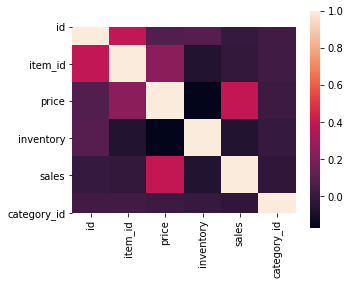

In [11]:
import seaborn as sns
#plot some heatmap to find correlation among the features
corrmat = train.corr();
f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

Each square in an heatmap shows how much any two feature correlates (is there some kind of relationship between them). 
Does the increase in one feature result in the increase of the other-->(Positive correlation) or does the increase in one result in the decrease of the other -->(Negative correlation).

The vertical range running from 0.0 to 1.0 shows you the relative size of the correlation between any two features, where hotter values are higher and means more correlation.
The diagonal almost-whitish portion of the matrix shows that all features are highly correlated to the themselves.  

Tracing the first label horizontally to the left leads to Week_number and tracing it vertically downwards, leads to Week_Id. This means the square box (3) is showing us how correlated price and Category_Id are. We can see that they’re highly correlated as the color becomes hot pink.
Tracing the second interesting label shows the correlation between Price and  Sales. We clearly see that the region is hot, meaning there’s a high correlation.
 

# we start adding significant features

Price_category: This is the price of each category 
Verdict: Important
This is a concatenation of the price and category identifier.
Reason: Some type of products categorues will generally sell more than others due to the price


Price_sales: 
This is a concatenation of the Price and sales.
Reason: Some type of product will generally sell more than others.
Verdict: Important
Reason: This is certainly an important feature because the price of products will definitely affect out the sales

In [12]:
imputed_tr['Price_Category'] = imputed_tr[['price','category_id']].astype(str).apply('|'.join,1)
imputed_tr.head(10)

,id,history_date,item_id,price,inventory,sales,category_id,Units,Week_Number,Year,Week_Id,revenue,Price_Category
0,103,2014-01-01,394908219,24.97,374,0,3,0,1,2014,1,0,24.97|3
1,223,2014-01-01,394942631,106.33,374,0,3,0,1,2014,1,0,106.33|3
2,319,2014-01-01,511895631,31.98,374,0,3,0,1,2014,1,0,31.98|3
3,427,2014-01-01,512317778,33.21,102,0,3,0,1,2014,1,0,33.21|3
4,487,2014-01-01,512319955,117.62,139,0,3,0,1,2014,1,0,117.62|3
5,571,2014-01-01,512464656,287.46,235,0,3,0,1,2014,1,0,287.46|3
6,18,2014-01-01,394853569,119.04,271,0,3,0,1,2014,1,0,119.04|3
7,282,2014-01-01,395334759,30.05,242,0,3,0,1,2014,1,0,30.05|3
8,306,2014-01-01,395360835,121.58,0,0,3,0,1,2014,1,0,121.58|3
9,402,2014-01-01,512319957,17.44,146,138.05,3,7,1,2014,1,122.08,17.44|3


# Make sure to perform any other transformations for missing values, outliers, improperly scaled information, or anything else that would represent a best practice for data scientists.

In [13]:
imputed_tr.isnull().sum() # make sure that we haven't any NaN attribute

id                0
history_date      0
item_id           0
price             0
inventory         0
sales             0
category_id       0
Units             0
Week_Number       0
Year              0
Week_Id           0
revenue           0
Price_Category    0
dtype: int64

# Model Creation

In [25]:
#aggregation of two dataset : could help in modeling
#all sales with or not promotion
imputed_tr['item_id']=imputed_tr['item_id'].astype(int)

result=pd.merge(imputed_tr,data_promo,on='item_id',how='left') # left join task

result['promo_start_dt'] = pd.to_datetime(result['promo_start_dt'])
result['promo_end_dt'] = pd.to_datetime(result['promo_end_dt'])

result['promo_type'] = np.where(result['promo_start_dt']>result['history_date'], 'NO_PROMO',result['promo_type'])
result['promo_type'] = np.where(result['promo_end_dt']<result['history_date'], 'NO_PROMO',result['promo_type'])
result['promo_type'] = np.where(result['promo_type'].isnull(), 'NO_PROMO',result['promo_type'])

result['promo_type'].value_counts()


d = {'NO_PROMO': 0, 'PROMO_A': 1, 'PROMO_B':2, 'PROMO_C':3}
result['promo_type'] = result['promo_type'].map(d)

result.head()
# if we will need this table we should impute NaN attribute for sales with no promotion

,id,history_date,item_id,price,inventory,sales,category_id,Units,Week_Number,Year,Week_Id,revenue,Price_Category,promo_type,promo_start_dt,promo_end_dt
0,103,2014-01-01,394908219,24.97,374,0,3,0,1,2014,1,0,24.97|3,0,NaT,NaT
1,223,2014-01-01,394942631,106.33,374,0,3,0,1,2014,1,0,106.33|3,0,NaT,NaT
2,319,2014-01-01,511895631,31.98,374,0,3,0,1,2014,1,0,31.98|3,0,NaT,NaT
3,427,2014-01-01,512317778,33.21,102,0,3,0,1,2014,1,0,33.21|3,0,2014-02-18,2014-03-20
4,487,2014-01-01,512319955,117.62,139,0,3,0,1,2014,1,0,117.62|3,0,NaT,NaT
